In [1]:
import glob
import os
import re

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
files = sorted(glob.glob(f"output/*_0.txt"))

In [5]:
nodes_df = pd.DataFrame()

for file in files:
    alpha = 108 if "108" in file else 75
#    if alpha != 108:
#        continue
    gamma = re.match(r".*gamma(\d+)_.*", file).group(1)
    df = pd.read_csv(file,
                     sep=" ",
                     usecols=["node_id", "path"],
                     index_col="node_id",
                     converters={"path": lambda x: 1 if x.endswith(";") else 0})\
        .rename({"path": f"{alpha}-{gamma}"}, axis=1)\
        .sort_index()
    nodes_df = pd.concat([nodes_df, df], axis=1)

nodes_df

,75-115,75-120,75-130,75-135,75-140,75-145,75-150,75-155,75-160,75-165,75-170,75-175,75-180,108-50,108-55,108-60,108-65,108-70
node_id,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1351,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1352,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [22]:
nodes_df = pd.DataFrame()

for file in files:
    alpha = 108 if "108" in file else 75
    if alpha != 75:
        continue
    gamma = re.match(r".*gamma(\d+)_.*", file).group(1)
    df = pd.read_csv(file,
                     sep=" ",
                     usecols=["node_id", "level 1"],
                     index_col="node_id",
                     converters={"level 1": lambda x: float(x) if float(x) < 0.9 else np.nan})\
        .rename({"level 1": f"{alpha}-{gamma}"}, axis=1)\
        .sort_index()
    nodes_df = pd.concat([nodes_df, df], axis=1)

nodes_df

,75-115,75-120,75-130,75-135,75-140,75-145,75-150,75-155,75-160,75-165,75-170,75-175,75-180
node_id,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.446691,0.594059
1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.446691,0.594059
1352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.446691,0.594059


/var/folders/f2/dcxgc0gs1ggc8kk00xqhtl6h0000gn/T/ipykernel_47536/2632792596.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


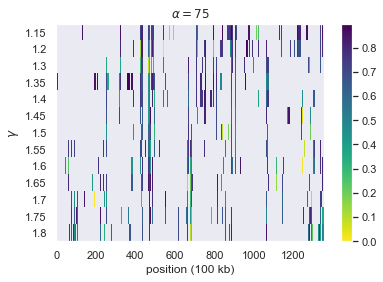

In [29]:
plt.imshow(nodes_df.to_numpy().T, interpolation='nearest', aspect='auto', cmap="viridis_r")
plt.title("$\\alpha=75$")
plt.yticks(list(range(len(nodes_df.columns))), [int(x.split("-")[1])/100 for x in nodes_df.columns])
#plt.yticks(list(range(len(nodes_df.columns))), [x for x in nodes_df.columns])
plt.ylabel("$\gamma$")
plt.xlabel("position (100 kb)")
plt.grid(False)
plt.colorbar()
plt.savefig(f"results/fringe-75.png", dpi=600, bbox_inches="tight")